# Mutating an ensemble

In [2]:
# This simulates the installation the user will be able tu just import pyFoldx.Trajectory
import sys
sys.path.append("/home/lradusky/Dropbox/workspacesbg/pyFoldX")

In [3]:
from src.structure.Ensemble import Ensemble

In [17]:
#Other imports
import seaborn as sns
import matplotlib.pyplot as plt

We create an Ensemble just loading the one we saved in the previous tutorial

In [5]:
pathEnsbl = "/home/lradusky/Downloads/P01112/"
inEnsbl = pathEnsbl+"ensemble.pdb"

In [7]:
t = Ensemble("P01112", pathEnsbl, inEnsbl)

To mutate an ensemble we just have to call the *mutate* function. We need to specify:

- Which mutations we want to model, in the format ORIGINAL_RESIDUE + POSITION + MUTATED_RESIDUE separated by comma for each mutation.
- If we want to generate a mutations ensemble: if True, ensembles with all the wild type and mutated models will be generated. Note that this can be memory consuming for big ensembles.

In [8]:
ddGsDataFrame, trajMut, trajWT = t.mutate("G13A", generateMutationsEnsemble=True)

Computing mutation(s) G13A along ensemble...


 16%|█▌        | 5/31 [01:08<04:46, 11.01s/it]

5P21 failed


 26%|██▌       | 8/31 [01:51<04:34, 11.96s/it]

3OIU failed


 48%|████▊     | 15/31 [04:10<04:01, 15.11s/it]

3OIW failed


 74%|███████▍  | 23/31 [07:01<02:17, 17.16s/it]

3RSO failed


 90%|█████████ | 28/31 [08:31<00:44, 14.95s/it]

2RGG failed


100%|██████████| 31/31 [09:12<00:00, 17.82s/it]

5E95 failed
Mutations computed.


As we can observe, those crystals without the specified wild type residue in the specified position or that presents a problem will be excluded from the output.

In [10]:
# We can save the generated ensembles into files
trajMut.saveToPDB(pathEnsbl+"mutated.pdb")
trajWT.saveToPDB(pathEnsbl+"WT.pdb")

And the *mutate* function will return a Pandas DataFrame with the $\Delta \Delta G$ provoked by the mutation(s) along the ensemble.

In [11]:
ddGsDataFrame

,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,energy_SolvH,energy_vdwclash,entrop_sc,entrop_mc,...,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
2QUZ_A,2.430899,0.000000e+00,0.000000,-0.120081,0.001796,0.192267,-0.122237,1.356597,0.000000,1.122572,...,0.0,-0.000015,0.027332,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
1CTQ_A,2.475635,0.000000e+00,0.000000,-0.108886,0.002627,0.196515,-0.104946,1.352795,0.002743,1.134817,...,0.0,-0.000030,0.031207,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
1QRA_A,2.490189,0.000000e+00,0.000000,-0.110238,0.002429,0.193937,-0.101489,1.351178,0.006514,1.147874,...,0.0,-0.000017,0.030519,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
121P_A,2.449612,0.000000e+00,0.000000,-0.093239,0.001703,0.161667,-0.093994,1.351870,-0.005065,1.126672,...,0.0,-0.000003,0.026409,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
821P_A,2.422355,0.000000e+00,-0.044328,-0.190048,-0.066053,0.385437,-0.197204,1.353596,0.096339,1.091495,...,0.0,-0.000423,-0.003212,-6.453636e-03,0.0,0.0,0.0,0.000000e+00,-2.775558e-17,0.0
3TGP_A,2.465623,0.000000e+00,0.000000,-0.090474,0.001802,0.168627,-0.087389,1.351837,0.000000,1.121235,...,0.0,-0.000016,0.028242,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
3L8Z_A,3.288339,6.166059e-03,0.003855,-0.314014,0.002495,0.395544,-0.425117,1.403751,0.100362,2.115345,...,0.0,-0.000048,0.139121,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
2RGC_A,2.471249,0.000000e+00,0.003093,-0.273981,0.002481,0.287176,-0.380968,1.433516,0.084638,1.315316,...,0.0,-0.000022,0.029816,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
4DLU_A,2.403270,0.000000e+00,0.003137,-0.273081,0.002336,0.278902,-0.379017,1.403700,0.086332,1.280971,...,0.0,-0.000011,0.029293,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
2RGB_A,2.450308,0.000000e+00,0.003316,-0.271676,0.001788,0.288001,-0.377801,1.410677,0.082971,1.313051,...,0.0,-0.000018,0.030820,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0


Let's, for example, analyze the energy changes provoked by the mutations along the ensemble.

No handles with labels found to put in legend.


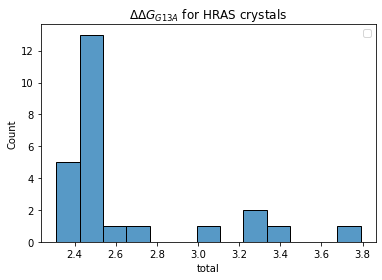

In [22]:
sns.histplot(ddGsDataFrame.total).set_title("$\Delta \Delta G_{G13A}$ for HRAS crystals")
plt.legend()

As can be seen, depending on the structure we have different $\Delta \Delta G$s, but all of them presents a high value, allowing us to infer that the mutation is destabilizing.